In [2]:
import cv2, numpy as np
import matplotlib.pyplot as plt

In [3]:
image = cv2.imread('Mod4CT1.jpg',1)

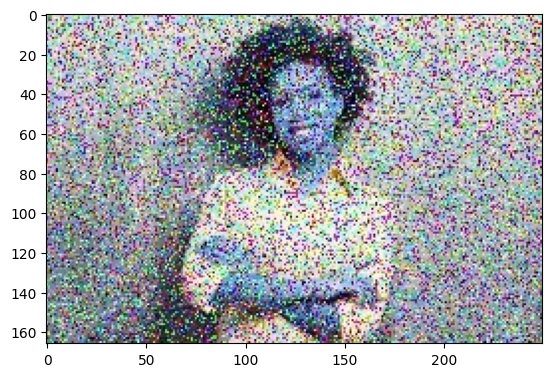

In [4]:
plt.imshow(image)

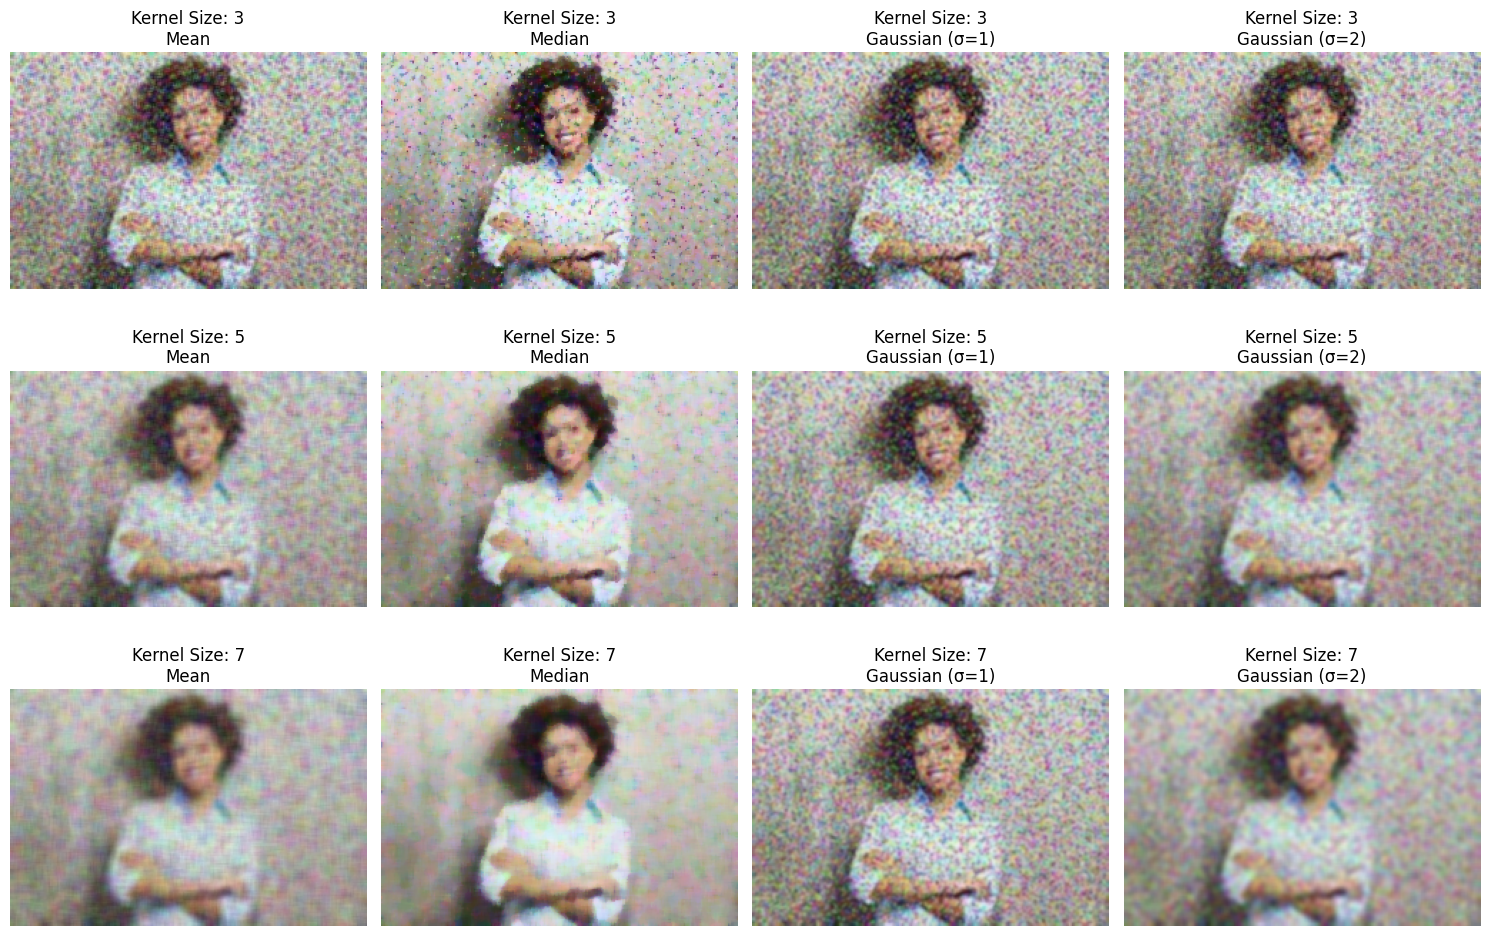

In [15]:

# Define a function to apply the filters
def apply_filters(image, kernel_sizes, sigma_values):
    results = {}
    
    for kernel_size in kernel_sizes:
        # Create a filter key for the current kernel size
        results[kernel_size] = {}
        
        # Mean filter
        results[kernel_size]['Mean'] = cv2.blur(image, (kernel_size, kernel_size))
        
        # Median filter
        results[kernel_size]['Median'] = cv2.medianBlur(image, kernel_size)
        
        # Gaussian filters
        for sigma in sigma_values:
            gaussian_filtered = cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)
            results[kernel_size][f'Gaussian (σ={sigma})'] = gaussian_filtered
    
    return results

# Kernel sizes and sigma values
kernel_sizes = [3, 5, 7]
sigma_values = [1, 2]  # Selecting good values for sigma

# Apply filters
filtered_results = apply_filters(image, kernel_sizes, sigma_values)

# Set up the plotting
fig, axes = plt.subplots(3, 4, figsize=(15, 10))

# Titles for the plots
titles = ['Mean', 'Median', 'Gaussian (σ=1)', 'Gaussian (σ=2)']

# Plotting results
for i, kernel_size in enumerate(kernel_sizes):
    for j, title in enumerate(titles):
        axes[i, j].imshow(cv2.cvtColor(filtered_results[kernel_size][title], cv2.COLOR_BGR2RGB))
        axes[i, j].set_title(f'Kernel Size: {kernel_size}\n{title}')
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()
